In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.multivariate.pca import PCA

In [ ]:
penguin = pd.read_csv("/content/penguins.csv")
penguin.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,male,2009
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
85,Adelie,Dream,41.3,20.3,194.0,3550.0,male,2008
264,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,female,2009
254,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,female,2009
231,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,male,2008
30,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
141,Adelie,Dream,40.6,17.2,187.0,3475.0,male,2009
308,Chinstrap,Dream,42.5,16.7,187.0,3350.0,female,2008
319,Chinstrap,Dream,45.5,17.0,196.0,3500.0,female,2008


In [ ]:
model=PCA(
  data = penguin.iloc[:,2:-2].fillna(0),
  #standardize = True,
  normalize = True,
  ncomp = 4)

comp_0   -0.141533
comp_1   -0.153043
comp_2   -0.127054
comp_3   -0.137035
dtype: float64

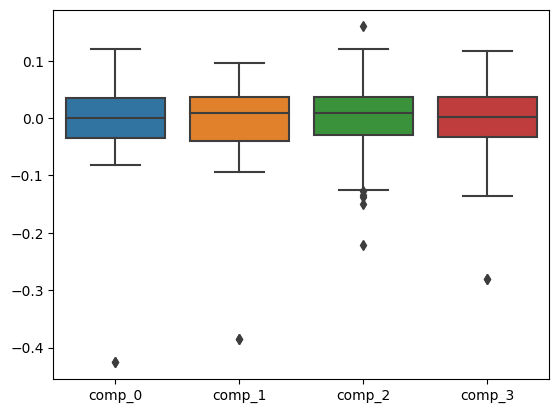

In [ ]:
sns.boxplot(model.scores)
hbound=model.scores.describe().iloc[-2,:]+1.5*(model.scores.describe().iloc[-2,:]-\
model.scores.describe().iloc[-4,:])
lbound=model.scores.describe().iloc[-4,:]-1.5*(model.scores.describe().iloc[-2,:]-\
model.scores.describe().iloc[-4,:])
lbound

In [ ]:
(model.scores<lbound).sum()

comp_0    2
comp_1    2
comp_2    5
comp_3    2
dtype: int64

In [ ]:
(model.scores>hbound).sum()

comp_0    0
comp_1    0
comp_2    1
comp_3    0
dtype: int64

In [ ]:
err=(((model.scores<lbound)|(model.scores>hbound)).sum(axis=1)>0).values
penguin[err]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
293,Chinstrap,Dream,58.0,17.8,181.0,3700.0,female,2007
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
322,Chinstrap,Dream,50.1,17.9,190.0,3400.0,female,2009
324,Chinstrap,Dream,51.5,18.7,187.0,3250.0,male,2009
331,Chinstrap,Dream,52.2,18.8,197.0,3450.0,male,2009


In [ ]:
model.scores.iloc[err,:]

,comp_0,comp_1,comp_2,comp_3
3,-0.426061,-0.385970,-0.110981,-0.281265
14,-0.022836,0.072318,0.159621,-0.037375
271,-0.426061,-0.385970,-0.110981,-0.281265
293,0.013725,0.037180,-0.221237,-0.110277
314,-0.031626,0.013377,-0.137218,0.104539
322,-0.007825,0.035145,-0.127966,-0.003188
324,-0.009817,0.055555,-0.150194,-0.016469
331,0.006689,0.057129,-0.133746,0.011538


In [ ]:
hbound1=penguin.iloc[:,2:-2].describe().iloc[-2,:]+1.5*(penguin.iloc[:,2:-2].describe().iloc[-2,:]-\
penguin.iloc[:,2:-2].describe().iloc[-4,:])
lbound1=penguin.iloc[:,2:-2].describe().iloc[-4,:]-1.5*(penguin.iloc[:,2:-2].describe().iloc[-2,:]-\
penguin.iloc[:,2:-2].describe().iloc[-4,:])

In [ ]:
err1=(((penguin.iloc[:,2:-2]<lbound1)|(penguin.iloc[:,2:-2]>hbound1)).sum(axis=1)>0).values
penguin[err1]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [ ]:
penguin.iloc[:,2:-2].describe().iloc[2,:]

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
Name: std, dtype: float64

In [ ]:
model.scores@model.loadings.T

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.028189,0.044720,-0.056335,0.012798
1,-0.027551,0.011742,-0.031502,-0.000702
2,-0.021936,0.012946,0.034152,-0.076701
3,-0.159009,-0.357710,-0.516926,-0.038398
4,-0.070309,0.051683,0.025449,-0.035231
...,...,...,...,...
339,0.136247,0.049380,-0.018326,-0.045421
340,0.005426,0.011993,0.046609,-0.081692
341,0.086207,0.018516,-0.042835,-0.036072
342,0.070808,0.035060,0.015938,-0.034203


In [ ]:
(penguin.iloc[:,2:-2]-penguin.iloc[:,2:-2].describe().iloc[1,:])/penguin.iloc[:,2:-2].describe().iloc[2,:]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.883205,0.784300,-1.416272,-0.563317
1,-0.809939,0.126003,-1.060696,-0.500969
2,-0.663408,0.429833,-0.420660,-1.186793
3,NaN,NaN,NaN,NaN
4,-1.322799,1.088129,-0.562890,-0.937403
...,...,...,...,...
339,2.175637,1.341320,0.432721,-0.251578
340,-0.077282,0.480471,0.077145,-0.999750
341,1.040019,0.531109,-0.562890,-0.532143
342,1.259816,0.936215,0.646066,-0.126883


In [ ]:
x1=penguin.iloc[:,2:-2].fillna(0)-penguin.iloc[:,2:-2].mean()

In [ ]:
U, S, VT = np.linalg.svd(x1, full_matrices = False)
S = np.diag(S)
k=3
pd.DataFrame(U[:,:k] @ S[0:k,:k] @ VT[:k,:], columns=penguin.columns[2:-2])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-4.592694,-0.632757,-19.798461,-451.758777
1,-4.349076,-0.444501,-14.878102,-401.755782
2,-3.660250,1.213517,-5.934720,-951.753652
3,-44.983344,-7.049926,-201.455754,-4201.734054
4,-7.033508,0.355660,-7.819246,-751.757995
...,...,...,...,...
339,11.947403,1.989009,6.120104,-201.755714
340,-0.492265,1.618196,1.048975,-801.753039
341,5.679809,1.032281,-7.914319,-426.754419
342,6.923165,1.419670,9.107761,-101.755250


In [ ]:
from sklearn.metrics import mean_squared_error
k=1
mean_squared_error(x1, pd.DataFrame(U[:,:k] @ S[0:k,:k] @ VT[:k,:], columns=penguin.columns[2:-2]))

42.234750360398195

# Лаба

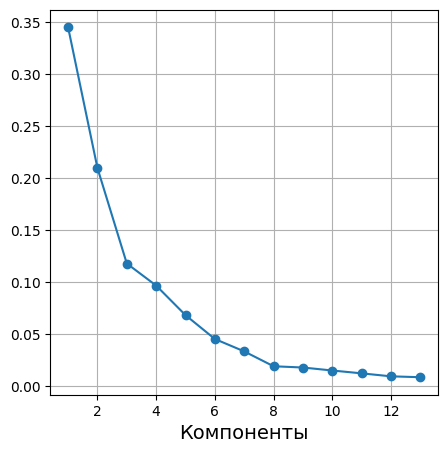

In [85]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x=load_wine()['data']
y=load_wine()['target']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

pca=PCA()
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)
ev=pca.explained_variance_
pv=ev/np.sum(ev)

plt.figure(figsize=(5,5))
plt.plot(np.arange(1, len(pv)+1), pv, marker = 'o')
plt.xlabel('Компоненты', size = 14)
plt.grid(True)

In [86]:
pca=PCA(n_components=4)
PC1=pca.fit_transform(x_train)[:,0]
PC2=pca.fit_transform(x_train)[:,1]
PC3=pca.fit_transform(x_train)[:,2]
PC4=pca.fit_transform(x_train)[:,3]

ldngs=pca.components_
ld=pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PCA"], index=load_wine().feature_names)
ld

,PC1,PC2,PC3,PCA
alcohol,0.146698,-0.504171,0.117235,-0.206255
malic_acid,-0.242246,-0.242169,-0.149947,-0.130489
ash,-0.029934,-0.286985,-0.656394,-0.015154
alcalinity_of_ash,-0.255190,0.064687,-0.584282,0.090422
magnesium,0.120798,-0.229954,-0.082263,0.839128
total_phenols,0.389345,-0.093640,-0.180804,-0.193179
flavanoids,0.423265,-0.010886,-0.142959,-0.140460
nonflavanoid_phenols,-0.306350,-0.018702,-0.172235,-0.337333
proanthocyanins,0.305722,-0.030404,-0.158362,0.114753
color_intensity,-0.098692,-0.545271,0.142422,-0.078786


In [87]:
scalPC1=1.0/(PC1.max()-PC1.min())
scalPC2=1.0/(PC2.max()-PC2.min())
scalPC3=1.0/(PC3.max()-PC3.min())
scalPC4=1.0/(PC4.max()-PC4.min())
features=load_wine().feature_names

<Figure size 640x480 with 0 Axes>

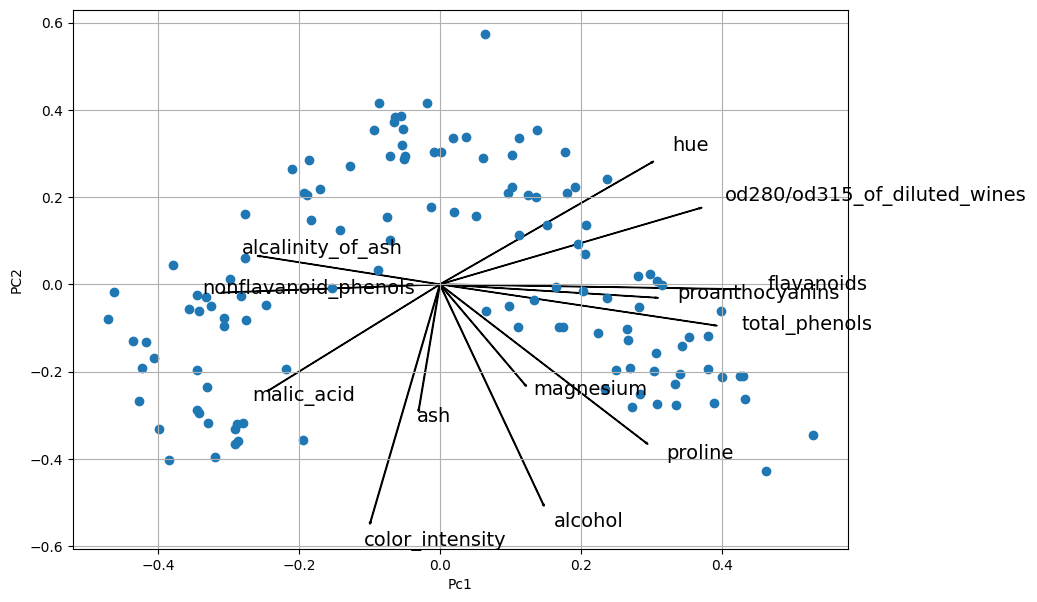

<Figure size 640x480 with 0 Axes>

In [88]:
fig, ax=plt.subplots(figsize=(10, 7))
for i, feature in enumerate(features):
  ax.arrow(0, 0, ldngs[0, i], ldngs[1,i])
  ax.text(ldngs[0,i]*1.10, ldngs[1, i]*1.10, feature, fontsize=14)
ax.scatter(PC1*scalPC1, PC2*scalPC2)

ax.set_xlabel("Pc1")
ax.set_ylabel ("PC2")
plt.grid(True)
plt.figure()

<Figure size 640x480 with 0 Axes>

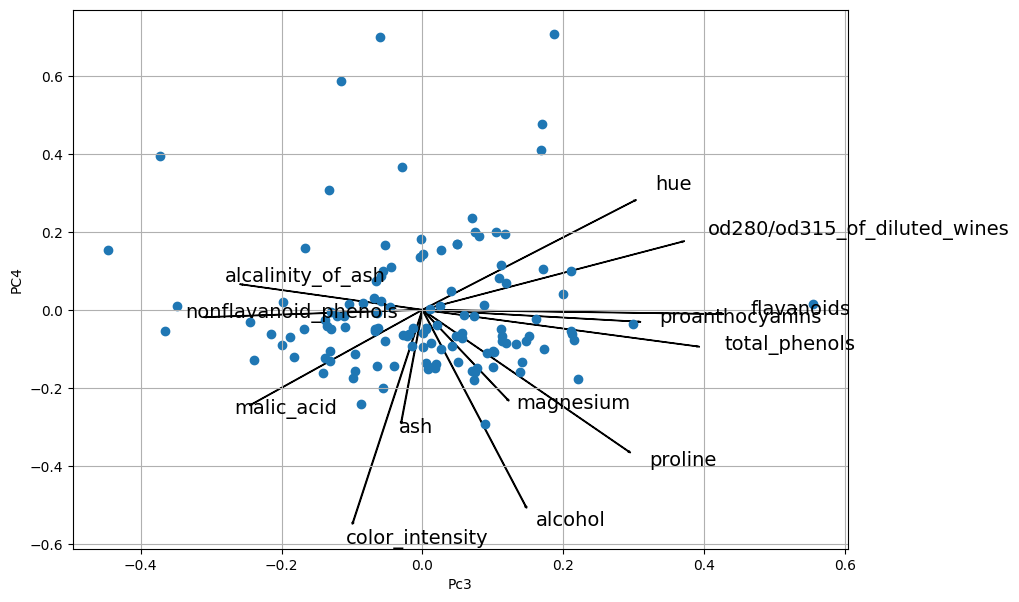

<Figure size 640x480 with 0 Axes>

In [89]:
fig, ax=plt.subplots(figsize=(10, 7))
for i, feature in enumerate(features):
  ax.arrow(0, 0, ldngs[0, i], ldngs[1,i])
  ax.text(ldngs[0,i]*1.10, ldngs[1, i]*1.10, feature, fontsize=14)
ax.scatter(PC3*scalPC3, PC4*scalPC4)

ax.set_xlabel("Pc3")
ax.set_ylabel ("PC4")
plt.grid(True)
plt.figure()

In [94]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
x=df.iloc[:,1:-1]
y=df.iloc[:,-1].values

--2023-08-09 16:57:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls.1’

default of credit c     [   <=>              ]   5.28M  10.2MB/s    in 0.5s    

2023-08-09 16:57:38 (10.2 MB/s) - ‘default of credit card clients.xls.1’ saved [5539328]



In [95]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [96]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

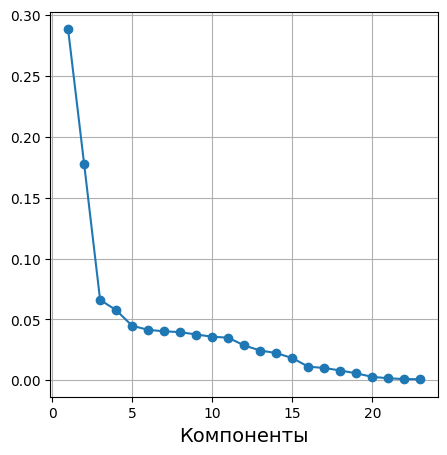

In [97]:
pca=PCA()
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)
ev=pca.explained_variance_
pv=ev/np.sum(ev)
plt.figure(figsize=(5,5))
plt.plot(np.arange(1, len(pv)+1), pv, marker = 'o')
plt.xlabel('Компоненты', size = 14)

plt.grid(True)

In [103]:
pca=PCA(n_components=4)
PC1=pca.fit_transform(x_train)[:,0]
PC2=pca.fit_transform(x_train)[:,1]
PC3=pca.fit_transform(x_train)[:,2]
PC4=pca.fit_transform(x_train)[:,3]

ldngs=pca.components_
ld=pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4"], index=x.columns)
ld

,PC1,PC2,PC3,PC4
LIMIT_BAL,0.066179,0.315487,0.020783,0.053567
SEX,-0.023529,0.031669,-0.011687,-0.071223
EDUCATION,0.019770,-0.091324,-0.184257,0.356564
MARRIAGE,-0.007760,-0.042353,0.249880,-0.583844
AGE,0.013999,0.067132,-0.248877,0.603786
PAY_0,0.163688,-0.297148,-0.005335,0.027488
PAY_2,0.195836,-0.332376,0.034153,0.043566
PAY_3,0.201945,-0.343140,0.088910,0.057668
PAY_4,0.208723,-0.342345,0.122123,0.061830
PAY_5,0.211867,-0.330386,0.143772,0.060091


<Figure size 640x480 with 0 Axes>

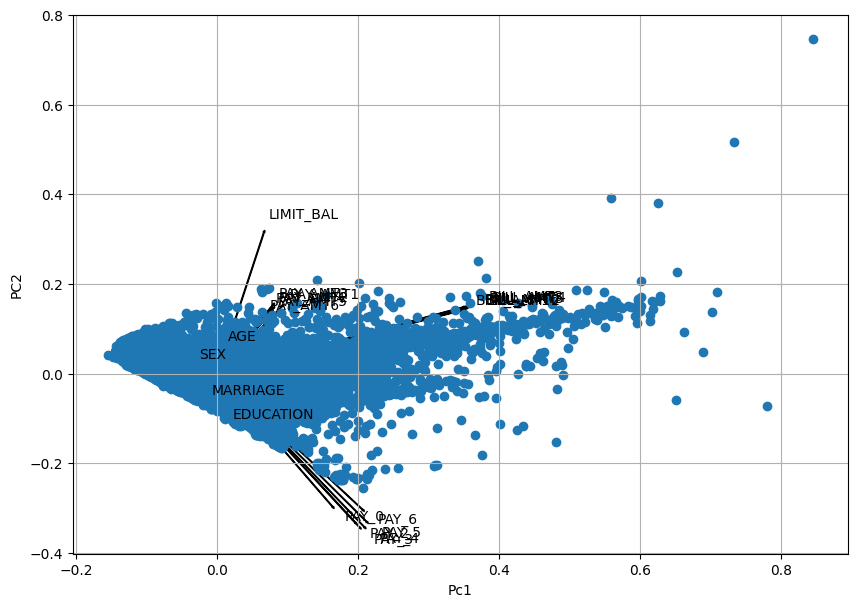

<Figure size 640x480 with 0 Axes>

In [106]:
scalPC1=1.0/(PC1.max()-PC1.min())
scalPC2=1.0/(PC2.max()-PC2.min())
scalPC3=1.0/(PC3.max()-PC3.min())
scalPC4=1.0/(PC4.max()-PC4.min())

fig, ax=plt.subplots(figsize=(10, 7))
for i, feature in enumerate(list(x.columns)):
  ax.arrow(0, 0, ldngs[0, i], ldngs[1,i])
  ax.text(ldngs[0,i]*1.10, ldngs[1, i]*1.10, feature)
ax.scatter(PC1*scalPC1, PC2*scalPC2)

ax.set_xlabel("Pc1")
ax.set_ylabel ("PC2")
plt.grid(True)
plt.figure()

<Figure size 640x480 with 0 Axes>

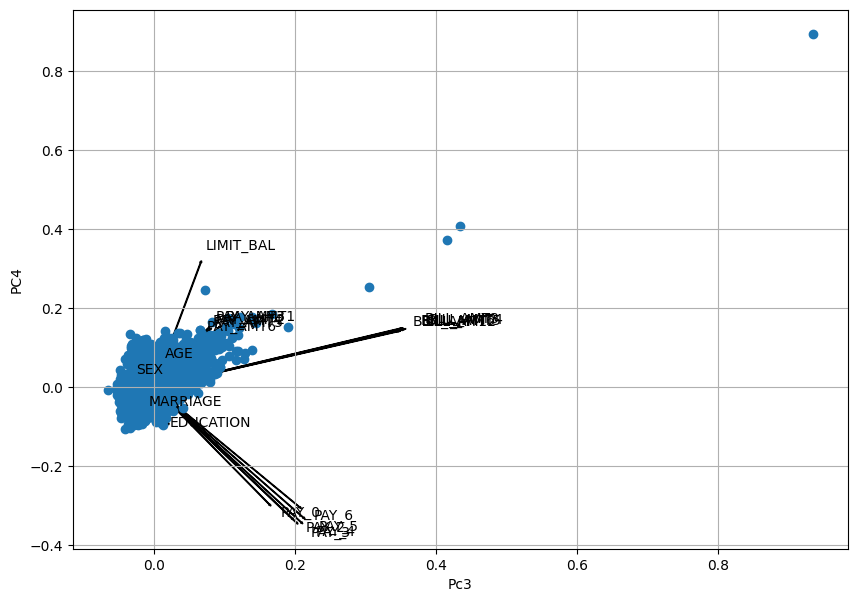

<Figure size 640x480 with 0 Axes>

In [107]:
fig, ax=plt.subplots(figsize=(10, 7))
for i, feature in enumerate(x.columns):
  ax.arrow(0, 0, ldngs[0, i], ldngs[1,i])
  ax.text(ldngs[0,i]*1.10, ldngs[1, i]*1.10, feature)
ax.scatter(PC3*scalPC3, PC4*scalPC4)

ax.set_xlabel("Pc3")
ax.set_ylabel ("PC4")
plt.grid(True)
plt.figure()